In [5]:
import pandas as pd
import networkx as nx
from itertools import combinations 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import csv

#-----------------------------All characters ---------------------------------
#list of the characters 
characters_list = ['Hamlet', 'King Claudius', 'Queen Gertrude', 'Horatio', 'Polonius', 'Laertes', 'Ophelia', 'Bernardo', 'Francisco', 'Marcellus', 'Ghost', 'King Fortinbras', 'Voltimand', 'Lords', 'Attendants', 'Rosencrantz', 'Guildenstern', 'Ambassadors from Norway', 'Players', 'First Player', 'Reynaldo', 'Lucianus', 'Player King', 'Player Queen', 'Prince Fortinbras', 'Captain', 'Gentlemen', 'Servant', 'First Sailor', 'First Clown', 'Second Clown', 'Priest', 'First Ambassador', 'Osric', 'A Lord', 'Cornelius', 'Messenger', 'Fortinbras']

# Dizionario
genere_dict = {
    'Hamlet': 'Male',
    'King Claudius': 'Male',
    'Queen Gertrude' : 'Female',
    'Horatio': 'Male',
    'Polonius': 'Male',
    'Laertes': 'Male',
    'Ophelia': 'Female',
    'Bernardo': 'Male',
    'Francisco': 'Male',
    'Marcellus': 'Male',
    'Ghost': 'Male',
    'King Fortinbras': 'Male',
    'Voltimand': 'Male',
    'Lords': 'Male',
    'Attendants': 'Male',
    'Rosencrantz': 'Male',
    'Guildenstern': 'Male',
    'Ambassadors from Norway': 'Male',
    'Players': 'Male',
    'First Player': 'Male',
    'Reynaldo': 'Male',
    'Lucianus': 'Male',
    'Player King': 'Male',
    'Player Queen': 'Male', 
    'Prince Fortinbras': 'Male', 
    'Captain': 'Male', 
    'Gentlemen': 'Male',
    'Servant': 'Male',
    'First Sailor': 'Male',
    'First Clown': 'Male',
    'Second Clown': 'Male', 
    'Priest': 'Male',
    'First Ambassador': 'Male',
    'Osric': 'Male',
    'A Lord': 'Male',
    'Cornelius': 'Male',
    'Messenger': 'Male',
    'Fortinbras': 'Male',

}

# Creazione del DataFrame
attributes_df = pd.DataFrame(list(genere_dict.items()), columns=['Character', 'Gender'])

# Aggiunta delle colonne vuote 'role' e 'place'
attributes_df = attributes_df.assign(Role='', Place='')

# Salvataggio in un file CSV
attributes_df.to_csv('attributes/attributes.csv', index=False)



#--------------------------Couples of co-apperences---------------------------------
def process_scene_csv(file_path):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Extract the 'Character' column
    characters = df['Character'].tolist()

    # Generate all possible combinations of characters (couples)
    character_combinations = list(combinations(characters, 2))

    return character_combinations

# Function to count occurrences of character pairs across all scenes
def count_character_pairs(scene_files):
    # Dictionary to store counts of character pairs
    character_counts = {}

    # Process each scene file
    for file_path in scene_files:
        scene_pairs = process_scene_csv(file_path)

        # Update counts based on character pairs in the current scene
        for pair in scene_pairs:
            # Sort the pair to handle cases where the order of characters doesn't matter
            sorted_pair = tuple(sorted(pair))
            
            # Update or initialize the count for the character pair
            character_counts[sorted_pair] = character_counts.get(sorted_pair, 0) + 1

    return character_counts

# Example usage:
scene_files = ['co-occurrences/scene_1.csv', 'co-occurrences/scene_2.csv', 'co-occurrences/scene_3.csv', 'co-occurrences/scene_4.csv', 'co-occurrences/scene_5.csv', 'co-occurrences/act2_scene_1.csv', 'co-occurrences/act_2_scene_2.csv', 'co-occurrences/act3_scene_1.csv', 'co-occurrences/act3_scene_2.csv', 'co-occurrences/act3_scene_3.csv', 'co-occurrences/act3_scene_4.csv', 'co-occurrences/act4_scene1.csv', 'co-occurrences/act4_scene2.csv', 'co-occurrences/act4_scene3.csv', 'co-occurrences/act4_scene4.csv', 'co-occurrences/act4_scene5.csv', 'co-occurrences/act4_scene6.csv', 'co-occurrences/act4_scene7.csv','co-occurrences/act5_scene1.csv', 'co-occurrences/act5_scene2.csv'] # Add your actual file paths here
result = count_character_pairs(scene_files)

# Print the results
#for pair, count in result.items():
    #print(f"Character Pair: {pair}, Count: {count}")

# Convert the result dictionary to a DataFrame for easier handling
result_df = pd.DataFrame(list(result.items()), columns=['Character Pair', 'Count'])
# Save the result to a CSV file
result_df.to_csv('co-occurrences/character_pairs_counts.csv', index=False)

#-------------------------------TEST--------------------------------------
# Print the graph edges with weights
#for edge in G.edges(data=True):
    #print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]['weight']}")

    
#------------------------------INTERACTIONS--------------------------------- 
keys_list = list(genere_dict.keys())

couples_set = set()
for i in range(len(keys_list)):
    for j in range(i + 1, len(keys_list)):
        couple = (keys_list[i], keys_list[j])
        couples_set.add(tuple(sorted(couple)))  # Sort the tuple to ensure uniqueness

# Count interactions
interactions_count = {couple: 0 for couple in couples_set}

# Update interactions count based on your provided interactions
# Replace 'your_interactions_data.csv' with the actual CSV file containing the interactions
with open('interactions/couples.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        for couple in couples_set:
            names = row['couples'].split(', ')
            if couple[0] in names and couple[1] in names:
                interactions_count[couple] += 1

# Writing to CSV file with interactions count
csv_file_path = 'interactions/couples_with_interactions.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['couples', 'interactions']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for couple, count in interactions_count.items():
        writer.writerow({'couples': f"{couple[0]}, {couple[1]}", 'interactions': count})

print(f'Couples with interactions count have been stored in {csv_file_path}')

FileNotFoundError: [Errno 2] No such file or directory: 'co-occurrences/scene_1.csv'

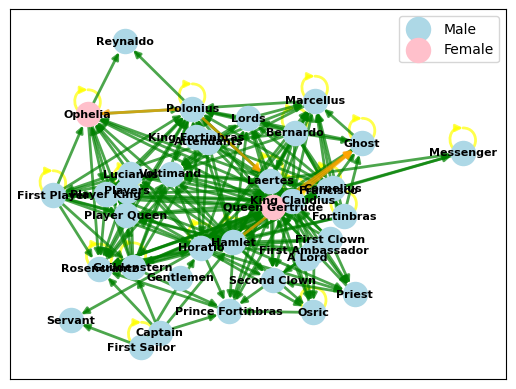

In [14]:
#---------------------Create a Graph------------------------------------
# ... (your previous code)

# Load the character pairs and their counts from the CSV file
result_df = pd.read_csv('character_pairs_counts.csv')

# Create a directed graph
G = nx.DiGraph()

# Add nodes with gender information
for character, gender in genere_dict.items():
    G.add_node(character, gender=gender)

# Add edges with weights based on co-appearances
for _, row in result_df.iterrows():
    character_pair = eval(row['Character Pair'])  # Convert string representation to tuple
    weight = row['Count']
    G.add_edge(character_pair[0], character_pair[1], weight=weight)



#---------------VISUALIZATION OF THE GRAPH---------------
import matplotlib.pyplot as plt

# Draw the graph with Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Separate edges based on interaction, co-appearance, or relationship
edges_interaction = [(u, v) for u, v, data in G.edges(data=True) if 'interaction_weight' in data]
edges_coappearance = [(u, v) for u, v, data in G.edges(data=True) if 'weight' in data and 'interaction_weight' not in data]
edges_relationship = [(u, v) for u, v, data in G.edges(data=True) if 'interaction_weight' not in data and 'weight' not in data]

# Separate nodes based on gender
nodes_male = [node for node, data in G.nodes(data=True) if data['gender'] == 'Male']
nodes_female = [node for node, data in G.nodes(data=True) if data['gender'] == 'Female']

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodes_male, node_size=300, node_color='lightblue', label='Male')
nx.draw_networkx_nodes(G, pos, nodelist=nodes_female, node_size=300, node_color='pink', label='Female')

# Draw edges based on interaction, co-appearance, or relationship
nx.draw_networkx_edges(G, pos, edgelist=edges_interaction, edge_color='yellow', width=2, alpha=0.7, label='Interaction')
nx.draw_networkx_edges(G, pos, edgelist=edges_coappearance, edge_color='green', width=2, alpha=0.7, label='Co-appearance')
nx.draw_networkx_edges(G, pos, edgelist=edges_relationship, edge_color='orange', width=2, alpha=0.7, label='Relationship')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Add legend
plt.legend()

# Show the plot
plt.show()


Couples with interactions count have been stored in couples_with_interactions.csv


In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = 'interactions/interaction_matrix.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


    Characters  The Servant  Reynaldo  Laertes  Fortinbras  First Sailor  \
0          0.0          0.0       0.0      0.0         0.0           0.0   
1          0.0          0.0       0.0      0.0         0.0           0.0   
2          0.0          0.0       0.0      0.0         0.0           0.0   
3          0.0          0.0       0.0      0.0         0.0           0.0   
4          0.0          0.0       0.0      0.0         0.0           0.0   
5          0.0          0.0       0.0      0.0         0.0           0.0   
6          0.0          0.0       0.0      0.0         0.0           0.0   
7          0.0          0.0       0.0      0.0         0.0           0.0   
8          0.0          0.0       0.0      0.0         0.0           0.0   
9          0.0          0.0       0.0      0.0         0.0           0.0   
10         0.0          0.0       0.0      0.0         0.0           0.0   
11         0.0          0.0       0.0      0.0         0.0           0.0   
12         0